# 第一讲

> 平均值, 标准差, 中值极限定理, 判定和风险, 假设检验

## 均值和标准差

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy

In [9]:
def drawLine(vFrom, vTo, value,plt,color='red',isHori=False):
    if isHori:
        plt.plot([vFrom,vTo],[value,value],color=color)
    else:
        plt.plot([value,value],[vFrom,vTo],color=color)

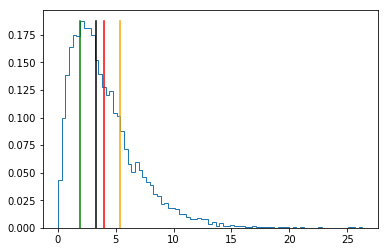

In [23]:
populationN = 10000
pops = {
    'randint':np.random.randint(1,100,populationN),
    'normal':np.random.normal(45,3,populationN),
    'chisq1':np.random.chisquare(1,populationN),
    'chisq2':np.random.chisquare(2,populationN),
    'chisq4':np.random.chisquare(4,populationN),
    'chisq20':np.random.chisquare(20,populationN),
}
pop1 = pops['chisq4']

count,bins,ignored = plt.hist(pop1,'auto',density=True,histtype='step')
c_max = count.max()
c_min = count.min()
drawLine(0,c_max,np.mean(pop1),plt,isHori=False)
drawLine(0,c_max,np.median(pop1),plt,color='black',isHori=False)
drawLine(0,c_max,np.quantile(pop1,0.25),plt,color='green',isHori=False)
drawLine(0,c_max,np.quantile(pop1,0.75),plt,color='orange',isHori=False)
plt.show()

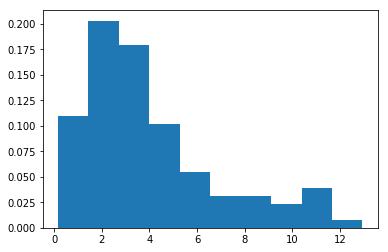

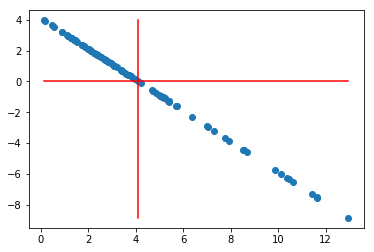

In [50]:
sampleN = 100
sample = np.random.choice(pop1,sampleN)
count,bins,ignored = plt.hist(sample,'auto',density=True)
plt.show()
s_min = math.floor(sample.min())
s_max = math.floor(sample.max())
s_mean = np.mean(sample)
sums_xi_minus_mean = []
for (i,e) in enumerate(sample):
    sums_xi_minus_mean.append((e,np.mean(sample-e)))
sums_xi_minus_mean.append((s_mean,np.mean(sample-s_mean)))
x_coords,y_coords = zip(*sums_xi_minus_mean)
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
plt.scatter(x_coords,y_coords)
drawLine(y_coords.min(),y_coords.max(),s_mean,plt,isHori=False)
drawLine(x_coords.min(),x_coords.max(),np.mean(sample-s_mean),plt,isHori=True)
plt.show()

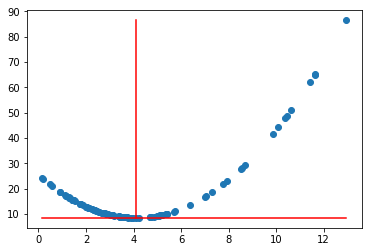

In [51]:
sums_xi_minus_mean_square = []
zoom_in = False
for (i,e) in enumerate(sample):
    sums_xi_minus_mean_square.append((e,np.mean((sample-e)*(sample-e))))
sums_xi_minus_mean_square.append((s_mean,np.mean((sample-s_mean)*(sample-s_mean))))
x_coords,y_coords = zip(*sums_xi_minus_mean_square)
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
plt.scatter(x_coords,y_coords)
drawLine(y_coords.min(),y_coords.max(),s_mean,plt,isHori=False)
drawLine(x_coords.min(),x_coords.max(),np.mean((sample-s_mean)*(sample-s_mean)),plt,isHori=True)
if zoom_in:
    plt.xlim(2,6)
    plt.ylim(np.mean((sample-s_mean)*(sample-s_mean)),18)
plt.show()